In [4]:
pip uninstall numpy
pip install numpy==1.20.0

SyntaxError: invalid syntax (3349045709.py, line 1)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import pdb
import matplotlib.pyplot as plt
import scipy

import torchvision
import torchvision.transforms as transforms

import os
import argparse
import time

import numpy as np

import time

import sklearn
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [3]:

# Get the current time
current_time = datetime.now()

# Add 8 hours to the current time
new_time = current_time + timedelta(hours=8)
print(new_time)

2024-05-22 13:25:49.541520


In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3"

device = 'cuda:1' if torch.cuda.is_available() else 'cpu'

In [ ]:
# results available 06/05/2024: 
# allBatches.pth  allBatches1Layers.pth  every100Batches.pth  training_results.pth BaselineAllLay.pth

In [65]:
# Important: train dataset is 500 batches , teest dataset is 100 batches. Each batch has size 100. So 60000 elements

In [8]:
def plot_from(file): 
    
    output_dir = './results/PearsonBatch04_05/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    file_path = os.path.join(output_dir, file+'.pth')

    loaded_data = torch.load(file_path)

    testtargets = loaded_data['testtargets']
    testouts = loaded_data['testouts']
    traintargets = loaded_data['traintargets']
    trainouts = loaded_data['trainouts']


############
    # Converting target indices to one-hot:
    tgt_idx = np.hstack(traintargets)
    tgt = np.zeros((tgt_idx.shape[0], 10))
    tgt[np.arange(tgt_idx.shape[0]), tgt_idx] = 1

    # Flattening the network outputs
    zetrainouts = trainouts
    inputs_f = [np.reshape(z, (z.shape[0], -1)) for z in zetrainouts] 
    inputs = np.vstack(inputs_f)

    print(inputs.shape) # (60000, 19600)
    print(tgt.shape)

    #-------------------------------------------------

    #one hot encode targets
    tgt_idx_test = np.hstack(testtargets)
    tgt_test = np.zeros((tgt_idx.shape[0], 10))
    tgt_test[np.arange(tgt_idx.shape[0]), tgt_idx_test] = 1

    #flattent the network outputs 
    zetestouts = testouts
    inputs_f_test = [np.reshape(z, (z.shape[0], -1)) for z in zetestouts] 
    inputs_test = np.vstack(inputs_f)
############

    print("----------------------------- PLOT THE COEFFICIENT / WEIGHTS MAGNITUDE STUDY")
        

    # Sample data from your results dictionary
    post_w_grad_mean = loaded_data['post_w_grad_mean']
    print(post_w_grad_mean[0].shape)
    post_w_grad_std = loaded_data['post_w_grad_std']
    print(post_w_grad_std[0].shape)
    pre_w_grad_mean = loaded_data['pre_w_grad_mean']
    print(pre_w_grad_mean[0].shape)
    pre_w_grad_std = loaded_data['pre_w_grad_std']
    print(pre_w_grad_std[0].shape)
    coeffs_mean = loaded_data['coeffs_mean']
    print(coeffs_mean[0].shape)
    coeffs_std = loaded_data['coeffs_std']
    print(coeffs_std[0].shape)
    # Display Gradient Statistics
    print("Gradient Statistics Comparison:")
    print("Pre-update Mean: ", np.mean(pre_w_grad_mean))
    print("Post-update Mean: ", np.mean(post_w_grad_mean))
    print("Pre-update Std Deviation: ", np.mean(pre_w_grad_std))
    print("Post-update Std Deviation: ", np.mean(post_w_grad_std))

    # Histogram of Coefficients Mean and Std
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(coeffs_mean, bins=20, alpha=0.7, label='Coeffs Mean')
    plt.title('Histogram of Coefficients Mean')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(coeffs_std, bins=20, alpha=0.7, color='red', label='Coeffs Std')
    plt.title('Histogram of Coefficients Std Dev')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.show()

    # Scatter Plot of Coefficients Mean vs. Gradient Means
    plt.figure()
    plt.scatter(coeffs_mean, pre_w_grad_mean, alpha=0.6, label='Pre-update Weights')
    plt.scatter(coeffs_mean, post_w_grad_mean, alpha=0.6, color='red', label='Post-update Weights')
    plt.title('Coefficients Mean vs. Weights Gradient Mean')
    plt.xlabel('Coefficients Mean')
    plt.ylabel('Weights Gradient Mean')
    plt.legend()
    plt.show()

        
    return tacc

In [ ]:
plot_from("allBatches1LayersCoeffs_20240510_111026")

In [9]:
def accuracy_from(file): 
    
    output_dir = './results/PearsonBatch04_05/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    file_path = os.path.join(output_dir, file+'.pth')

    loaded_data = torch.load(file_path)

    testtargets = loaded_data['testtargets']
    testouts = loaded_data['testouts']
    traintargets = loaded_data['traintargets']
    trainouts = loaded_data['trainouts']


############
    # Converting target indices to one-hot:
    tgt_idx = np.hstack(traintargets)
    tgt = np.zeros((tgt_idx.shape[0], 10))
    tgt[np.arange(tgt_idx.shape[0]), tgt_idx] = 1

    # Flattening the network outputs
    zetrainouts = trainouts
    inputs_f = [np.reshape(z, (z.shape[0], -1)) for z in zetrainouts] 
    inputs = np.vstack(inputs_f)

    print(inputs.shape) # (60000, 19600)
    print(tgt.shape)

    #-------------------------------------------------

    #one hot encode targets
    tgt_idx_test = np.hstack(testtargets)
    tgt_test = np.zeros((tgt_idx.shape[0], 10))
    tgt_test[np.arange(tgt_idx.shape[0]), tgt_idx_test] = 1

    #flattent the network outputs 
    zetestouts = testouts
    inputs_f_test = [np.reshape(z, (z.shape[0], -1)) for z in zetestouts] 
    inputs_test = np.vstack(inputs_f)
############
    
    tic = time.time()

    clf = linear_model.Ridge()   # Simple linear ridge regression of the 1-hot labels over the network outputs
    clf.fit(inputs, tgt)

    print("Time:", time.time() - tic)
    print("--------- Now Perform the lin regression: -------------")


    t = clf.predict(inputs_test)
    tm = np.argmax(t, axis=1)
    tacc = np.mean(tgt_idx_test==tm)
    print("Test accuracy:", tacc)

    print("\n--------- Now Perform the CROSS-VALIDATION: -------------")

    # Define the number of splits
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize the model
    clf = Ridge()

    # List to store accuracy of each fold
    accuracies = []

    for train_index, test_index in kf.split(inputs):
        # Split data
        X_train, X_test = inputs[train_index], inputs[test_index]
        y_train, y_test = tgt_test[train_index], tgt_test[test_index]

        # Train the model
        clf.fit(X_train, y_train)

        # Predict on test set
        predictions = clf.predict(X_test)
        predictions_max = np.argmax(predictions, axis=1)
        y_test_max = np.argmax(y_test, axis=1)

        # Calculate accuracy
        accuracy = np.mean(y_test_max == predictions_max)
        accuracies.append(accuracy)

    # Output the mean and standard deviation of accuracies
    print("Mean Accuracy:", np.mean(accuracies))
    
    print("Standard Deviation of Accuracies:", np.std(accuracies))

    return tacc

In [19]:
# New method 
accuracy_from("allBatches1LayersCoeffs_20240510_111026")

(60000, 19600)
(60000, 10)
Time: 19.96340322494507
--------- Now Perform the lin regression: -------------
Test accuracy: 0.9131

--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.42236666666666667
Standard Deviation of Accuracies: 0.003288701195845487


0.9131

In [18]:
# New method 
accuracy_from("allBatches1LayersCoeffs")

(60000, 19600)
(60000, 10)
Time: 18.955310106277466
--------- Now Perform the lin regression: -------------
Test accuracy: 0.9134166666666667
--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.42503333333333326
Standard Deviation of Accuracies: 0.0015586675220984265


0.9134166666666667

In [19]:
# New method 
accuracy_from("allBatches1LayersCoeffs09")

(60000, 19600)
(60000, 10)
Time: 18.55934429168701
--------- Now Perform the lin regression: -------------
Test accuracy: 0.9143833333333333
--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.43171666666666664
Standard Deviation of Accuracies: 0.0011673807338558355


0.9143833333333333

In [41]:
# Old method, implementation was likely incorrect
accuracy_from('BaselineAllLay')

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[4 0 6 0]
(60000, 10)
(60000, 1600)
Time: 5.216235876083374
--------- Now Perform the lin regression: -------------
Test accuracy: 0.4352666666666667


0.4352666666666667

In [39]:
# Old method, implementation was likely incorrect
accuracy_from('allBatches') #3 layered network, compute coeffs every batch. # no threshold on Pearson

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[8 9 2 5]
(60000, 10)
(60000, 1600)
Time: 11.473737239837646
--------- Now Perform the lin regression: -------------
Test accuracy: 0.35936666666666667


0.35936666666666667

In [42]:
accuracy_from('allBatches1Layers') # 1 layer network, updating w every batch 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[9 8 8 8]
(60000, 10)
(60000, 19600)
Time: 53.63573217391968
--------- Now Perform the lin regression: -------------
Test accuracy: 0.91295


0.91295

In [43]:
accuracy_from('every100Batches') # 3 layer network, updating w every 100 batches

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[3 3 4 0]
(60000, 10)
(60000, 1600)
Time: 4.993026494979858
--------- Now Perform the lin regression: -------------
Test accuracy: 0.43553333333333333


0.43553333333333333

In [92]:
filename= 'allBatches1Layers'
output_dir = './results/PearsonBatch04_05/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, filename+'.pth')

loaded_data = torch.load(file_path)

testtargets = loaded_data['testtargets'] #all 600 len lists of 100 elemnts.
testouts = loaded_data['testouts']
traintargets = loaded_data['traintargets']
trainouts = loaded_data['trainouts']

In [93]:
len(traintargets[0])

100

In [94]:
# Converting target indices to one-hot:
tgt_idx = np.hstack(traintargets)
tgt = np.zeros((tgt_idx.shape[0], 10))
tgt[np.arange(tgt_idx.shape[0]), tgt_idx] = 1

# Flattening the network outputs
zetrainouts = trainouts
inputs_f = [np.reshape(z, (z.shape[0], -1)) for z in zetrainouts] 
inputs = np.vstack(inputs_f)

print(inputs.shape) # (60000, 19600)
print(tgt.shape)

#-------------------------------------------------

#one hot encode targets
tgt_idx_test = np.hstack(testtargets)
tgt_test = np.zeros((tgt_idx.shape[0], 10))
tgt_test[np.arange(tgt_idx.shape[0]), tgt_idx_test] = 1

#flattent the network outputs 
zetestouts = testouts
inputs_f_test = [np.reshape(z, (z.shape[0], -1)) for z in zetestouts] 
inputs_test = np.vstack(inputs_f)

print(tgt_test.shape)
print(inputs_test.shape)


(60000, 19600)
(60000, 10)
(60000, 10)
(60000, 19600)


In [95]:
#p = torch.tensor(zetrainouts)
#p.shape #shape of x / network output for the 600 batches torch.Size([600, 100, 100, 14, 14])

In [96]:
clf = linear_model.Ridge()   # Simple linear ridge regression of the 1-hot labels over the network outputs
clf.fit(inputs, tgt)

print("Time:", time.time() - tic)

Time: 884.7388327121735


In [97]:
#test
t = clf.predict(inputs_test)
tm = np.argmax(t, axis=1)

tacc = np.mean(tgt_idx_test==tm)
print("Test accuracy:", tacc)

Test accuracy: 0.91295


In [89]:
accuracy_from('allBatches1Layers')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[9 8 8 8]
(60000, 10)
(60000, 19600)
Time: 88.93505883216858
--------- Now Perform the lin regression: -------------
Test accuracy: 0.91295


0.91295

In [98]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

In [99]:
# Define the number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
clf = Ridge()

# List to store accuracy of each fold
accuracies = []

for train_index, test_index in kf.split(inputs):
    # Split data
    X_train, X_test = inputs[train_index], inputs[test_index]
    y_train, y_test = tgt_test[train_index], tgt_test[test_index]

    # Train the model
    clf.fit(X_train, y_train)

    # Predict on test set
    predictions = clf.predict(X_test)
    predictions_max = np.argmax(predictions, axis=1)
    y_test_max = np.argmax(y_test, axis=1)

    # Calculate accuracy
    accuracy = np.mean(y_test_max == predictions_max)
    accuracies.append(accuracy)

# Output the mean and standard deviation of accuracies
print("Mean Accuracy:", np.mean(accuracies))
print("Standard Deviation of Accuracies:", np.std(accuracies))


Mean Accuracy: 0.4192666666666667
Standard Deviation of Accuracies: 0.003833115935864429


In [20]:
accuracy_from('allBatches1LayersCoeffs04_20240510_140206')

(60000, 19600)
(60000, 10)
Time: 31.538299560546875
--------- Now Perform the lin regression: -------------
Test accuracy: 0.91545

--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.4347
Standard Deviation of Accuracies: 0.0017484914132537938


0.91545

In [21]:
accuracy_from('allBatches1LayersCoeffs06_20240510_140147')

(60000, 19600)
(60000, 10)
Time: 29.571301221847534
--------- Now Perform the lin regression: -------------
Test accuracy: 0.9130666666666667

--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.43579999999999997
Standard Deviation of Accuracies: 0.005368788400457663


0.9130666666666667

In [22]:
accuracy_from('allBatches1LayersCoeffs09_20240510_140151')

(60000, 19600)
(60000, 10)
Time: 24.434109687805176
--------- Now Perform the lin regression: -------------
Test accuracy: 0.9149

--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.43465
Standard Deviation of Accuracies: 0.0031751640377572043


0.9149

In [23]:
accuracy_from('Baseline1Lay')

(60000, 19600)
(60000, 10)
Time: 25.701008558273315
--------- Now Perform the lin regression: -------------
Test accuracy: 0.9145333333333333

--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.43605
Standard Deviation of Accuracies: 0.003980019542107249


0.9145333333333333

In [24]:
accuracy_from('BaselineAllLay')

(60000, 1600)
(60000, 10)
Time: 0.8222122192382812
--------- Now Perform the lin regression: -------------
Test accuracy: 0.4352666666666667

--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.37615000000000004
Standard Deviation of Accuracies: 0.005059479551627161


0.4352666666666667

In [25]:
accuracy_from('allBatches2LayersCoeffs0.6_20240513_134612')

(60000, 7056)
(60000, 10)
Time: 3.816798448562622
--------- Now Perform the lin regression: -------------
Test accuracy: 0.6908666666666666

--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.4770833333333334
Standard Deviation of Accuracies: 0.006704683271995622


0.6908666666666666

In [26]:
accuracy_from('allBatches3LayersCoeffs0.6_20240513_142635')

(60000, 1600)
(60000, 10)
Time: 0.730158805847168
--------- Now Perform the lin regression: -------------
Test accuracy: 0.42951666666666666

--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.37216666666666665
Standard Deviation of Accuracies: 0.0036975968171532913


0.42951666666666666

In [28]:
accuracy_from('allBatches3LayersCoeffs1_20240513_150737 # MNIST baseline

(70000, 400)
(70000, 10)
Time: 0.1660752296447754
--------- Now Perform the lin regression: -------------
Test accuracy: 0.7433714285714286

--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.7388
Standard Deviation of Accuracies: 0.003989117850413764


0.7433714285714286

In [31]:
# due to inconsitencies this is the baseline 2 layers:  allBatchesAllLay06PearsonThresh
accuracy_from('allBatchesAllLay06PearsonThresh')

(60000, 7056)
(60000, 10)
Time: 5.1220362186431885
--------- Now Perform the lin regression: -------------
Test accuracy: 0.6893333333333334

--------- Now Perform the CROSS-VALIDATION: -------------
Mean Accuracy: 0.47824999999999995
Standard Deviation of Accuracies: 0.004246567241117606


0.6893333333333334

# Correlation study (Pre coeff fix)

### On the 1 layered network

In [110]:
filename= 'allBatches1LayersCoeffs_20240510_111026'
output_dir = './results/PearsonBatch04_05/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, filename+'.pth')

loaded_data = torch.load(file_path)

In [111]:
loaded_data.keys()

dict_keys(['testtargets', 'testouts', 'traintargets', 'trainouts', 'post_w_grad_mean', 'post_w_grad_std', 'pre_w_grad_mean', 'pre_w_grad_std', 'coeffs_mean', 'coeffs_std', 'total_activations'])

In [112]:
len(loaded_data['coeffs_std'])

2400

In [113]:
#2400 , 100, 1 ##### Means for the coeffs per batch for the total of 2400 batches. Now, coeffs oscillate between -1,1

In [114]:
loaded_data['coeffs_std'][2000][0]

tensor([0.0069], device='cuda:1')

In [12]:
testtargets = loaded_data['testtargets'] #all 600 len lists of 100 elemnts.
testouts = loaded_data['testouts']
traintargets = loaded_data['traintargets']
trainouts = loaded_data['trainouts']

In [25]:
coeffs_mean_tensor = torch.stack(coeffs_mean)
coeffs_mean_tensor = coeffs_mean_tensor.squeeze(2)
coeffs_mean_tensor.shape

torch.Size([2400, 100])

In [26]:
coeffs_mean_tensor = torch.stack(coeffs_mean)
coeffs_mean_tensor = coeffs_mean_tensor.squeeze(2)
coeffs_mean_tensor.shape
# Assume loaded_data['coeffs_mean'] is already available as a list of tensors on GPU
coeffs_mean = loaded_data['coeffs_mean']
print("ok 0")

# Step 2: Compute the average mean per batch
average_means_per_batch = torch.mean(coeffs_mean_tensor, dim=1)
print("ok 2")

ok 0
ok 2


In [27]:
average_means_per_batch.shape

torch.Size([2400])

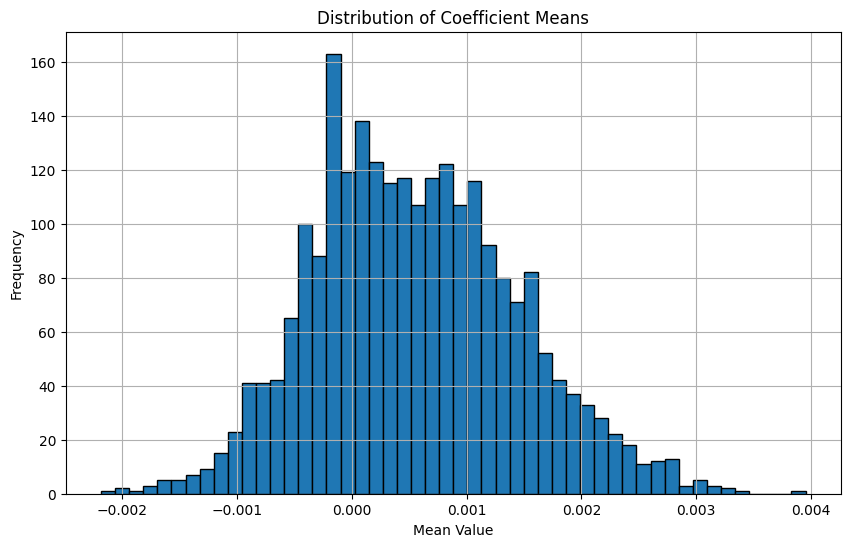

In [29]:
import matplotlib.pyplot as plt

# Assuming average_means_per_batch is already computed
average_means_per_batch_cpu = average_means_per_batch.cpu().numpy()

# Plot the distribution of means
plt.figure(figsize=(10, 6))
plt.hist(average_means_per_batch_cpu, bins=50, edgecolor='black')
plt.title('Distribution of Coefficient Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

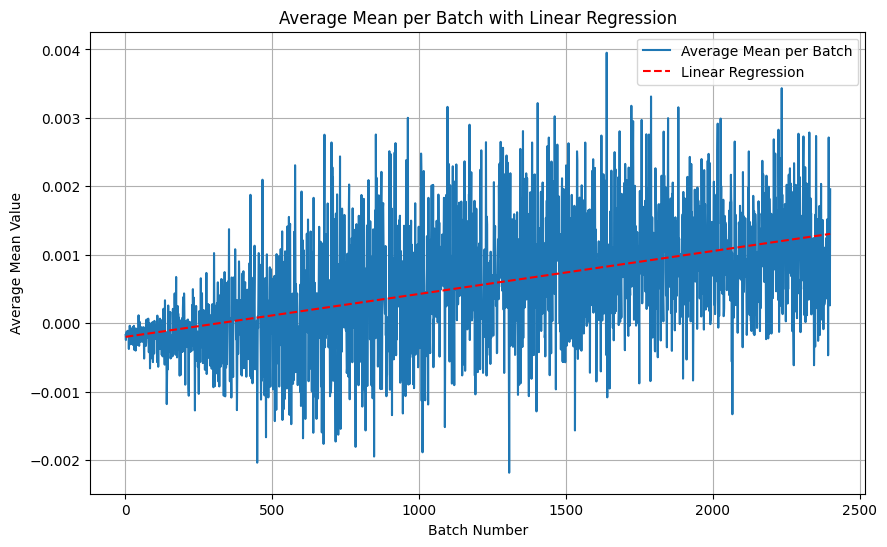

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming average_means_per_batch_cpu is already computed
x = np.arange(1, 2401)
y = average_means_per_batch_cpu

# Perform linear regression
coefficients = np.polyfit(x, y, 1)  # Linear regression
linear_regression = np.poly1d(coefficients)

# Generate y values for the linear regression line
y_lr = linear_regression(x)

# Plot the average mean per batch over the 2400 batches
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Average Mean per Batch')
plt.plot(x, y_lr, color='red', linestyle='--', label='Linear Regression')
plt.title('Average Mean per Batch with Linear Regression')
plt.xlabel('Batch Number')
plt.ylabel('Average Mean Value')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# Question : can we train for multiple epochs and see if this keeps growing ?

### On the 3 layered network

In [ ]:
# allBatches3LayersCoeffs0.6_20240513_142635

In [32]:
filename= 'allBatches3LayersCoeffs0.6_20240513_142635'
output_dir = './results/PearsonBatch04_05/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, filename+'.pth')

loaded_data = torch.load(file_path)

In [33]:
loaded_data.keys()

dict_keys(['testtargets', 'testouts', 'traintargets', 'trainouts', 'post_w_grad_mean', 'post_w_grad_std', 'pre_w_grad_mean', 'pre_w_grad_std', 'coeffs_mean', 'coeffs_std'])

In [34]:
len(loaded_data['coeffs_std'])

7200

In [ ]:
# First layer : [0:2400]
# Second layer : [2400:4800]
# Third layer : [4800:7200]


In [ ]:
loaded_data['coeffs_std'][2000][0]

In [40]:
# Assume loaded_data['coeffs_mean'] is already available as a list of tensors on GPU
coeffs_mean1 = loaded_data['coeffs_mean']
print("ok 0")

ok 0


In [71]:
coeffs_mean1[1::3][].shape

torch.Size([196, 100])

In [60]:
coeffs_mean1[1].shape

torch.Size([196, 100])

In [57]:
coeffs_mean1[2].shape

torch.Size([400, 196])

In [75]:
coeffs_mean_tensor2 = torch.stack(coeffs_mean1[2::3])
coeffs_mean_tensor2 = coeffs_mean_tensor2.squeeze(2)
coeffs_mean_tensor2 = coeffs_mean_tensor2.reshape(2400, -1)
coeffs_mean_tensor2.shape

torch.Size([2400, 78400])

In [76]:
coeffs_mean_tensor1 = torch.stack(coeffs_mean1[1::3])
coeffs_mean_tensor1 = coeffs_mean_tensor1.squeeze(2)
coeffs_mean_tensor1 = coeffs_mean_tensor1.reshape(2400, -1)

coeffs_mean_tensor1.shape

torch.Size([2400, 19600])

In [74]:
coeffs_mean_tensor0 = torch.stack(coeffs_mean1[0::3])
coeffs_mean_tensor0 = coeffs_mean_tensor0.squeeze(2)
coeffs_mean_tensor0.shape

torch.Size([2400, 100])

In [77]:
average_means_per_batch0 = torch.mean(coeffs_mean_tensor0, dim=1)


In [11]:
def plot_dist_means(average_means_per_batch, batches):
    
    # Assuming average_means_per_batch is already computed
    average_means_per_batch_cpu = average_means_per_batch.cpu().numpy()

    # Plot the distribution of means
    plt.figure(figsize=(10, 6))
    plt.hist(average_means_per_batch_cpu, bins=50, edgecolor='black')
    plt.title('Distribution of Coefficient Means')
    plt.xlabel('Mean Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Assuming average_means_per_batch_cpu is already computed
    x = np.arange(1, batches+1)
    y = average_means_per_batch_cpu

    # Perform linear regression
    coefficients = np.polyfit(x, y, 1)  # Linear regression
    linear_regression = np.poly1d(coefficients)

    # Generate y values for the linear regression line
    y_lr = linear_regression(x)

    # Plot the average mean per batch over the 2400 batches
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Average Mean per Batch')
    plt.plot(x, y_lr, color='red', linestyle='--', label='Linear Regression')
    plt.title('Average Mean per Batch with Linear Regression')
    plt.xlabel('Batch Number')
    plt.ylabel('Average Mean Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    return 0

#### Layer 1

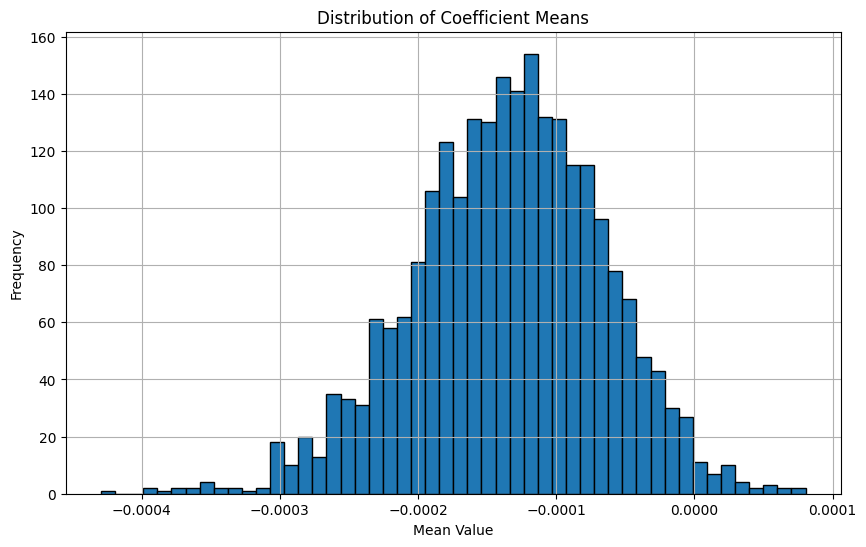

In [78]:
import matplotlib.pyplot as plt

# Assuming average_means_per_batch is already computed
average_means_per_batch_cpu = average_means_per_batch0.cpu().numpy()

# Plot the distribution of means
plt.figure(figsize=(10, 6))
plt.hist(average_means_per_batch_cpu, bins=50, edgecolor='black')
plt.title('Distribution of Coefficient Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

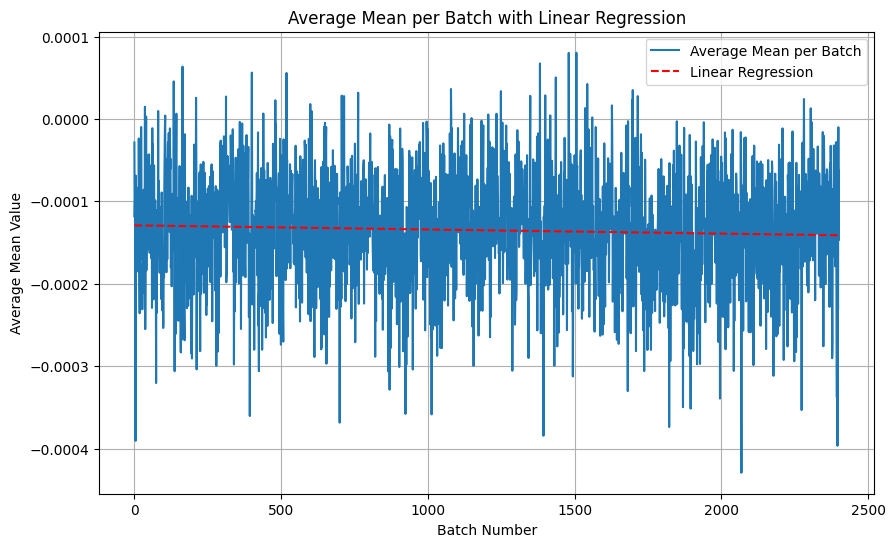

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming average_means_per_batch_cpu is already computed
x = np.arange(1, 2401)
y = average_means_per_batch_cpu

# Perform linear regression
coefficients = np.polyfit(x, y, 1)  # Linear regression
linear_regression = np.poly1d(coefficients)

# Generate y values for the linear regression line
y_lr = linear_regression(x)

# Plot the average mean per batch over the 2400 batches
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Average Mean per Batch')
plt.plot(x, y_lr, color='red', linestyle='--', label='Linear Regression')
plt.title('Average Mean per Batch with Linear Regression')
plt.xlabel('Batch Number')
plt.ylabel('Average Mean Value')
plt.legend()
plt.grid(True)
plt.show()

#### Layer 2

In [85]:
average_means_per_batch1 = torch.mean(coeffs_mean_tensor1, dim=1)


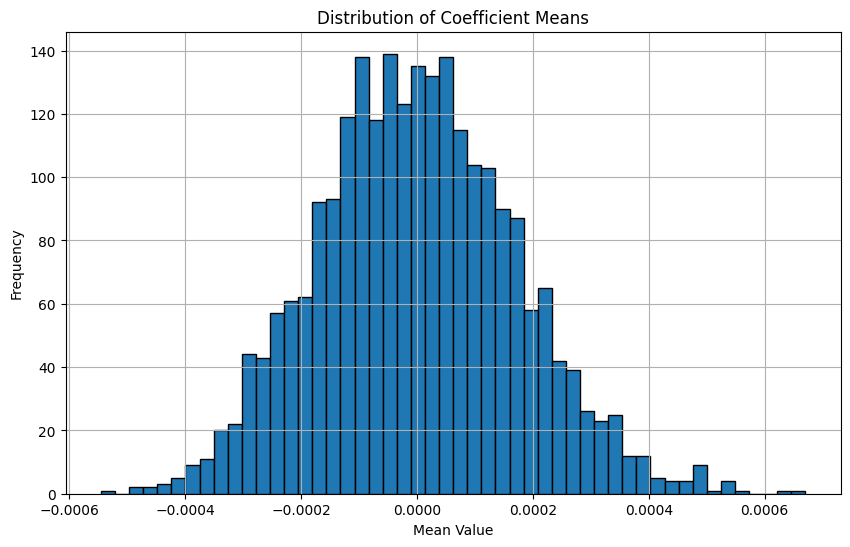

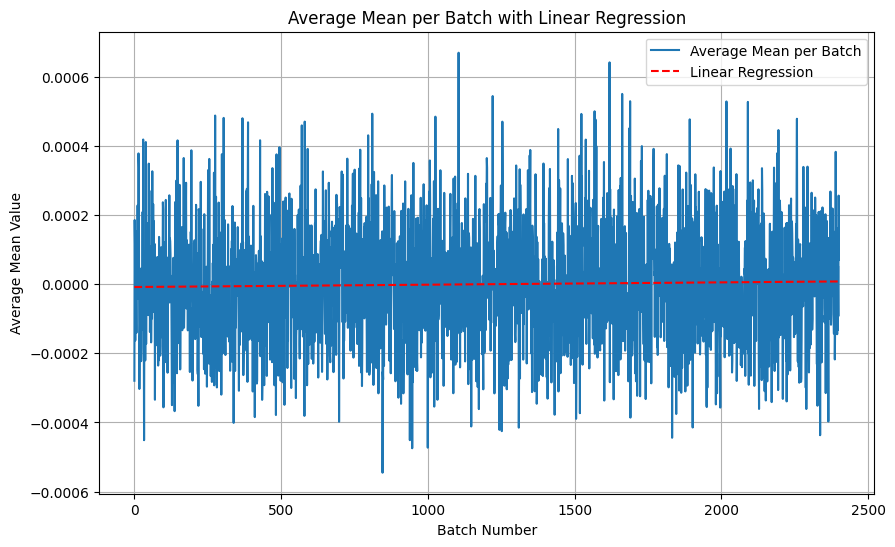

0

In [88]:
plot_dist_means(average_means_per_batch1)

#### Layer 3

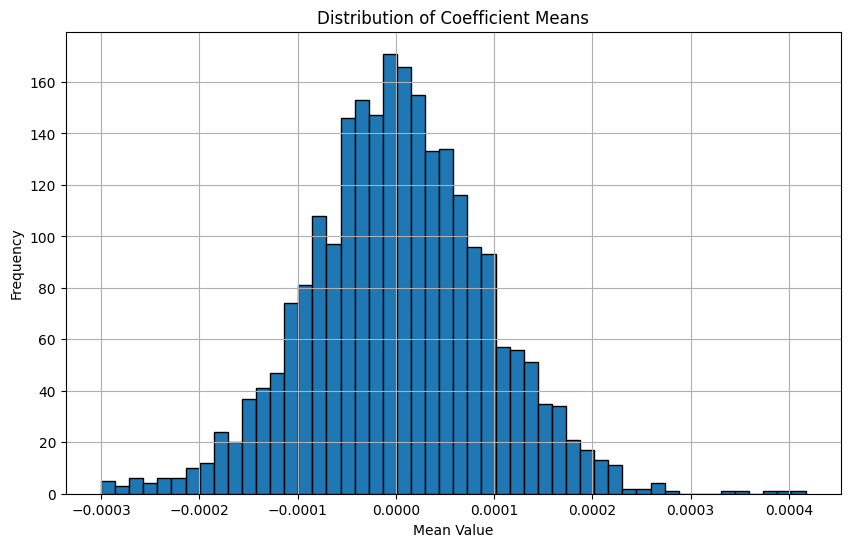

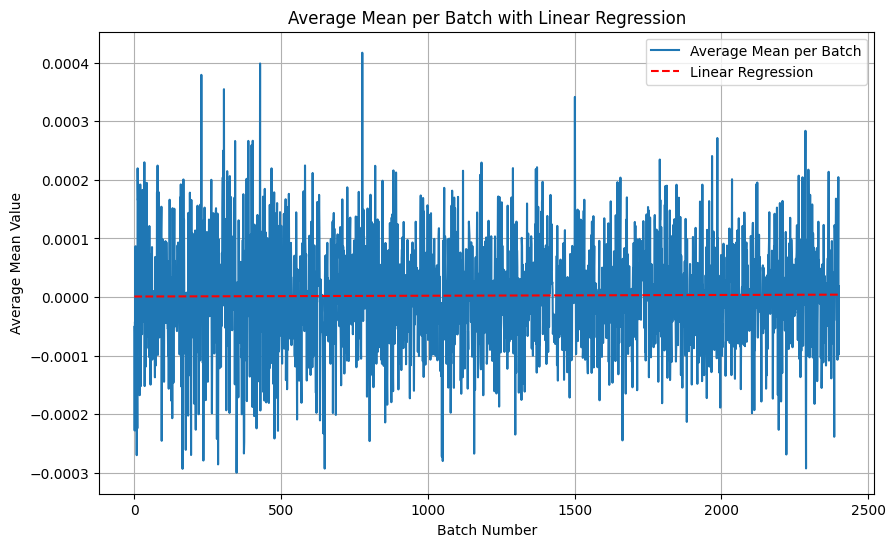

0

In [89]:
average_means_per_batch2 = torch.mean(coeffs_mean_tensor2, dim=1)
plot_dist_means(average_means_per_batch2)

In [102]:
po = torch.randn(100, 1, 5, 5)
mask = po > 0.3
s = torch.sign(po)

po.shape

torch.Size([100, 1, 5, 5])

In [103]:
po[mask].shape

torch.Size([960])

# Results after fixed coeffs

In [ ]:
# fixedCoeff/allBatches1LayersCoeffs0.6_20240522_153058 this one did 0 updates

### 1 Layered Network, threshold =0 (using the coeff all the time)

In [115]:
filename= 'fixedCoeff/allBatches1LayersCoeffs0_20240522_190916'
output_dir = './results/PearsonBatch04_05/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, filename+'.pth')

loaded_data = torch.load(file_path)

In [116]:
loaded_data.keys()

dict_keys(['testtargets', 'testouts', 'traintargets', 'trainouts', 'post_w_grad_mean', 'post_w_grad_std', 'pre_w_grad_mean', 'pre_w_grad_std', 'coeffs_mean', 'coeffs_std', 'total_activations'])

In [118]:
coeffs_mean_tensor = torch.stack(loaded_data['coeffs_mean'])
coeffs_mean_tensor = coeffs_mean_tensor.squeeze(2)
print(coeffs_mean_tensor.shape)

# Assume loaded_data['coeffs_mean'] is already available as a list of tensors on GPU
coeffs_mean = loaded_data['coeffs_mean']
print("ok 0")

# Step 2: Compute the average mean per batch
average_means_per_batch = torch.mean(coeffs_mean_tensor, dim=1)
print("ok 2")

torch.Size([2400, 100])
ok 0
ok 2


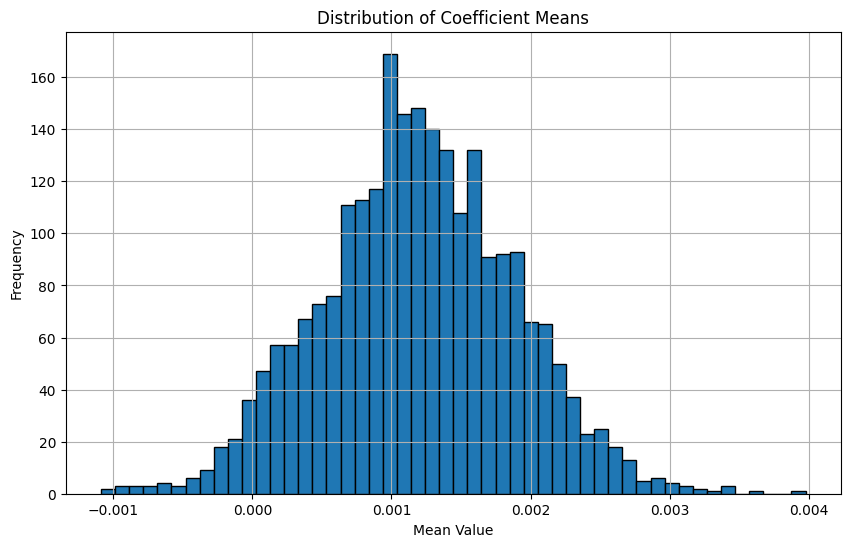

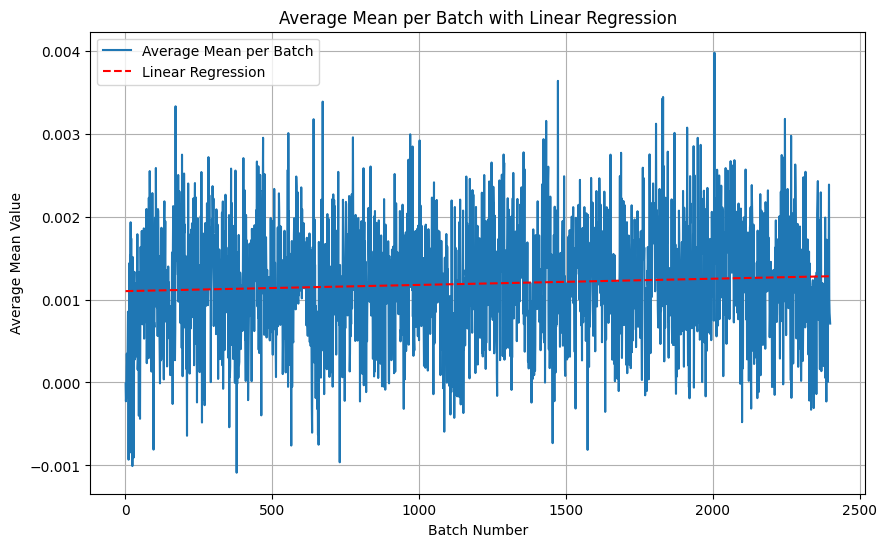

0

In [119]:
average_means_per_batch9 = torch.mean(coeffs_mean_tensor, dim=1)
plot_dist_means(average_means_per_batch9)

### Increasing from 3 to 20 epochs to see if correlation keeps increasing

In [ ]:
# 20epochs_allBatches1LayersCoeffs0_20240522_205209.pth

In [120]:
filename= 'fixedCoeff/20epochs_allBatches1LayersCoeffs0_20240522_205209'
output_dir = './results/PearsonBatch04_05/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, filename+'.pth')

loaded_data = torch.load(file_path)

In [121]:
coeffs_mean_tensor = torch.stack(loaded_data['coeffs_mean'])
coeffs_mean_tensor = coeffs_mean_tensor.squeeze(2)
print(coeffs_mean_tensor.shape)

# Assume loaded_data['coeffs_mean'] is already available as a list of tensors on GPU
coeffs_mean = loaded_data['coeffs_mean']
print("ok 0")

# Step 2: Compute the average mean per batch
average_means_per_batch = torch.mean(coeffs_mean_tensor, dim=1)
print("ok 2")

torch.Size([9900, 100])
ok 0
ok 2


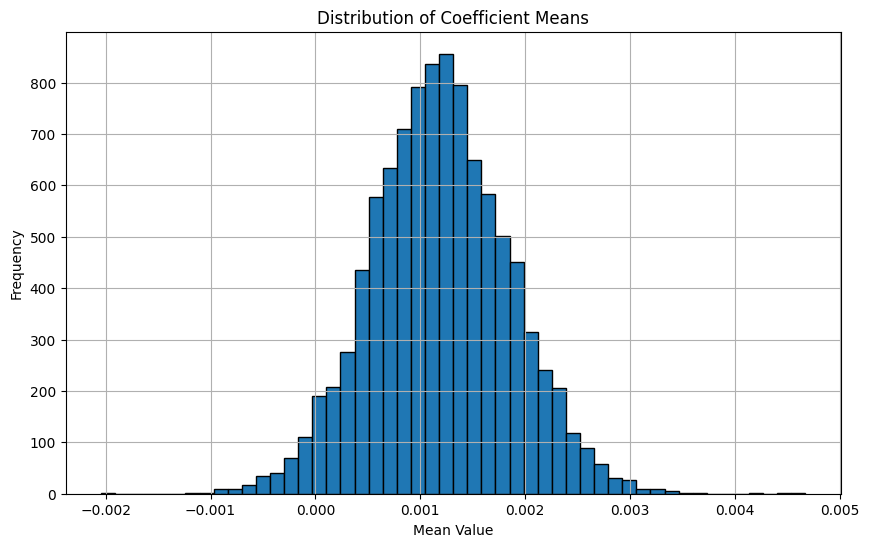

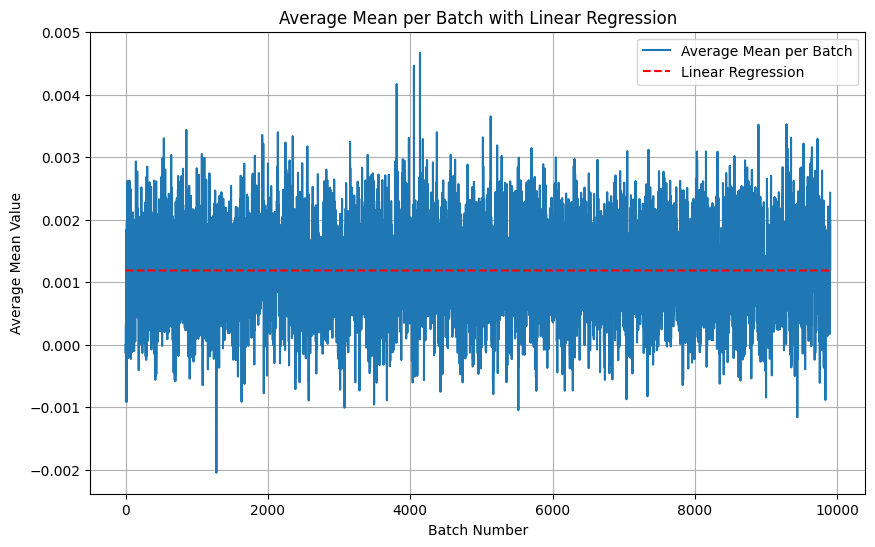

0

In [124]:
average_means_per_batch9 = torch.mean(coeffs_mean_tensor, dim=1)
plot_dist_means(average_means_per_batch9, 9900)

### Running on a threshold = 0.003 to see what happens.

In [ ]:
#20epochs_allBatches1LayersCoeffs0.003_20240523_124747.pth

In [126]:
filename= 'fixedCoeff/20epochs_allBatches1LayersCoeffs0.003_20240523_124747'
output_dir = './results/PearsonBatch04_05/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, filename+'.pth')

loaded_data = torch.load(file_path)

In [127]:
coeffs_mean_tensor = torch.stack(loaded_data['coeffs_mean'])
coeffs_mean_tensor = coeffs_mean_tensor.squeeze(2)
print(coeffs_mean_tensor.shape)

# Assume loaded_data['coeffs_mean'] is already available as a list of tensors on GPU
coeffs_mean = loaded_data['coeffs_mean']
print("ok 0")

# Step 2: Compute the average mean per batch
average_means_per_batch = torch.mean(coeffs_mean_tensor, dim=1)
print("ok 2")

torch.Size([9900, 100])
ok 0
ok 2


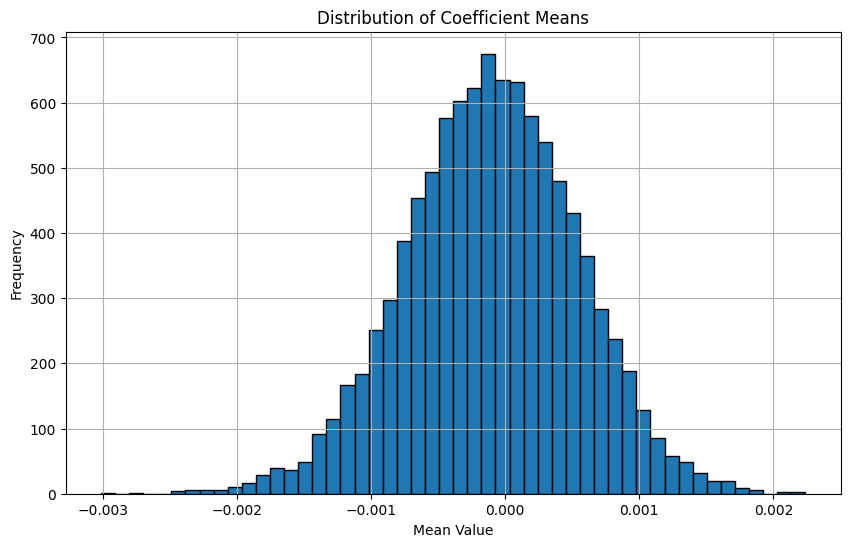

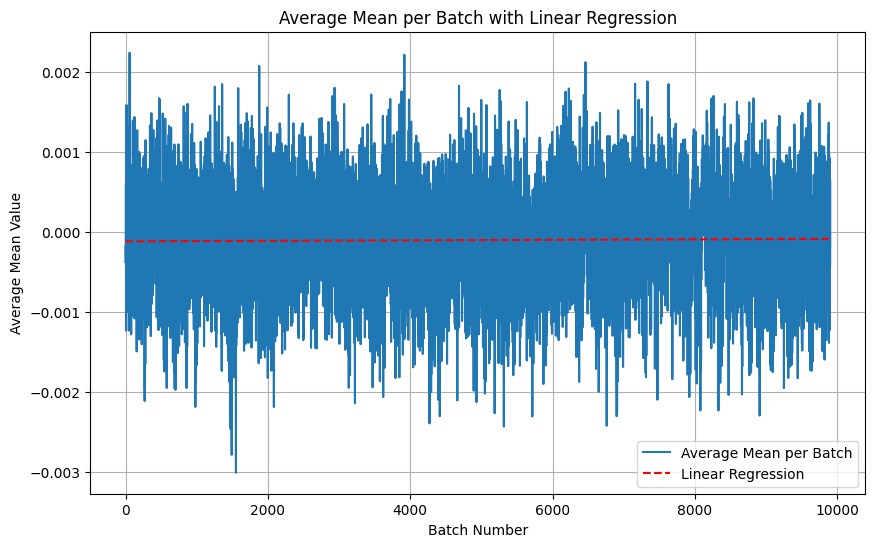

0

In [128]:
average_means_per_batch9 = torch.mean(coeffs_mean_tensor, dim=1)
plot_dist_means(average_means_per_batch9, 9900)

In [129]:
loaded_data.keys()

dict_keys(['testtargets', 'testouts', 'traintargets', 'trainouts', 'post_w_grad_mean', 'post_w_grad_std', 'pre_w_grad_mean', 'pre_w_grad_std', 'coeffs_mean', 'coeffs_std', 'total_activations'])

In [130]:
loaded_data['total_activations'] #that's too many activations.

[tensor(1890, device='cuda:1'),
 tensor(2025, device='cuda:1'),
 tensor(1970, device='cuda:1'),
 tensor(1948, device='cuda:1'),
 tensor(1896, device='cuda:1'),
 tensor(1925, device='cuda:1'),
 tensor(2006, device='cuda:1'),
 tensor(1714, device='cuda:1'),
 tensor(2087, device='cuda:1'),
 tensor(1646, device='cuda:1'),
 tensor(1849, device='cuda:1'),
 tensor(1947, device='cuda:1'),
 tensor(1854, device='cuda:1'),
 tensor(2075, device='cuda:1'),
 tensor(1604, device='cuda:1'),
 tensor(1861, device='cuda:1'),
 tensor(1934, device='cuda:1'),
 tensor(1907, device='cuda:1'),
 tensor(1755, device='cuda:1'),
 tensor(1917, device='cuda:1'),
 tensor(1677, device='cuda:1'),
 tensor(1716, device='cuda:1'),
 tensor(2046, device='cuda:1'),
 tensor(1825, device='cuda:1'),
 tensor(1942, device='cuda:1'),
 tensor(1789, device='cuda:1'),
 tensor(1908, device='cuda:1'),
 tensor(1592, device='cuda:1'),
 tensor(1876, device='cuda:1'),
 tensor(1917, device='cuda:1'),
 tensor(1813, device='cuda:1'),
 tensor(

In [ ]:
#allBatches1LayersCoeffs0.005_20240523_130822.pth

In [131]:
filename= 'fixedCoeff/allBatches1LayersCoeffs0.005_20240523_130822'
output_dir = './results/PearsonBatch04_05/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, filename+'.pth')

loaded_data = torch.load(file_path)

In [132]:
coeffs_mean_tensor = torch.stack(loaded_data['coeffs_mean'])
coeffs_mean_tensor = coeffs_mean_tensor.squeeze(2)
print(coeffs_mean_tensor.shape)

# Assume loaded_data['coeffs_mean'] is already available as a list of tensors on GPU
coeffs_mean = loaded_data['coeffs_mean']
print("ok 0")

# Step 2: Compute the average mean per batch
average_means_per_batch = torch.mean(coeffs_mean_tensor, dim=1)
print("ok 2")

torch.Size([1400, 100])
ok 0
ok 2


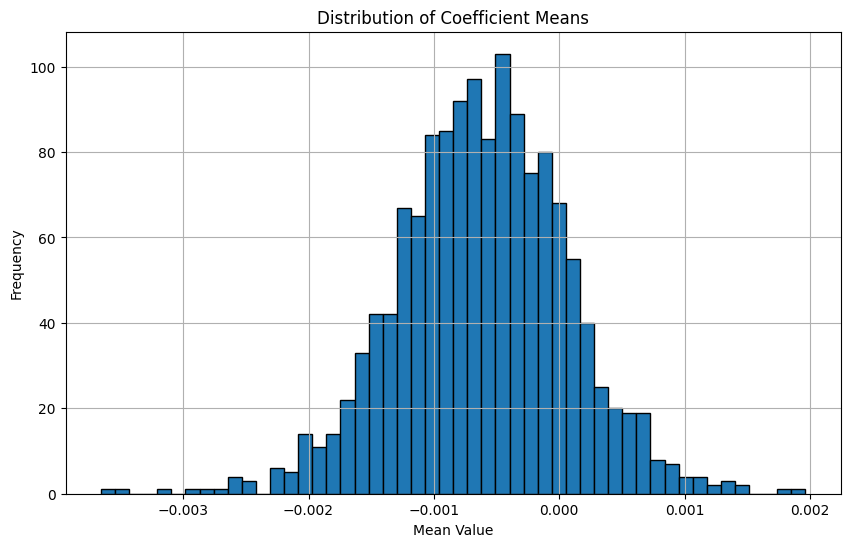

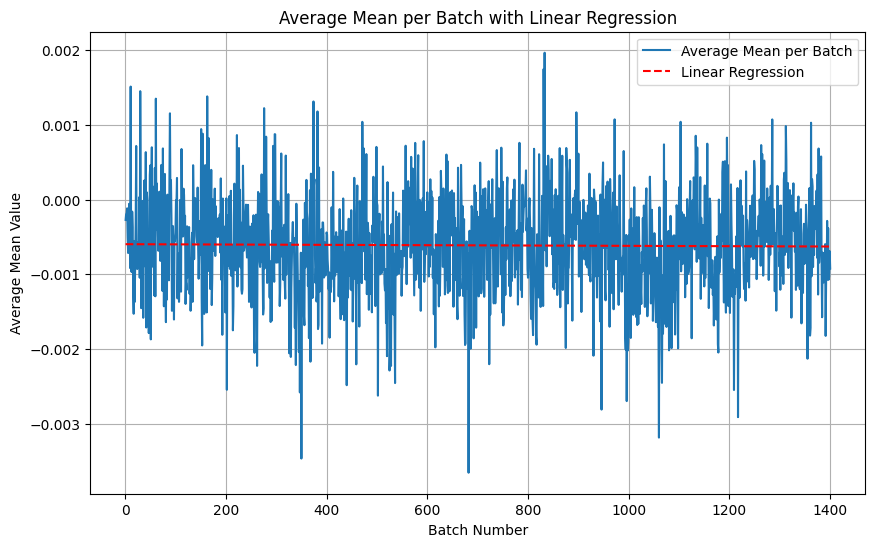

0

In [133]:
average_means_per_batch9 = torch.mean(coeffs_mean_tensor, dim=1)
plot_dist_means(average_means_per_batch9, 1400)

## Plot the distributions of absolute value of correlations 

In [4]:
filename= 'fixedCoeff/allBatches1LayersCoeffs0_20240530_120214'
output_dir = './results/PearsonBatch04_05/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, filename+'.pth')

loaded_data = torch.load(file_path)

In [5]:
coeffs_mean_tensor = torch.stack(loaded_data['coeffs_mean'])
coeffs_mean_tensor = coeffs_mean_tensor.squeeze(2)
print(coeffs_mean_tensor.shape)

# Assume loaded_data['coeffs_mean'] is already available as a list of tensors on GPU
coeffs_mean = loaded_data['coeffs_mean']
print("ok 0")

# Step 2: Compute the average mean per batch
average_means_per_batch = torch.mean(coeffs_mean_tensor, dim=1)
print("ok 2")

torch.Size([2400, 100])
ok 0
ok 2


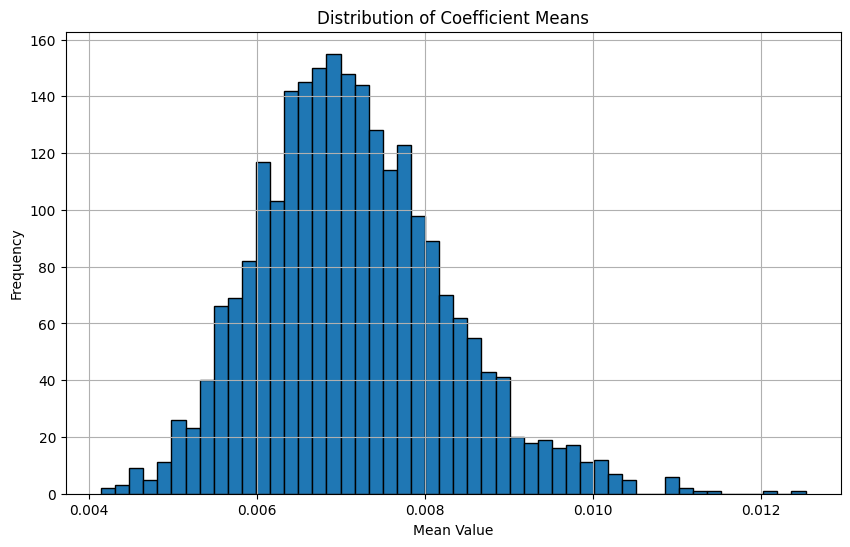

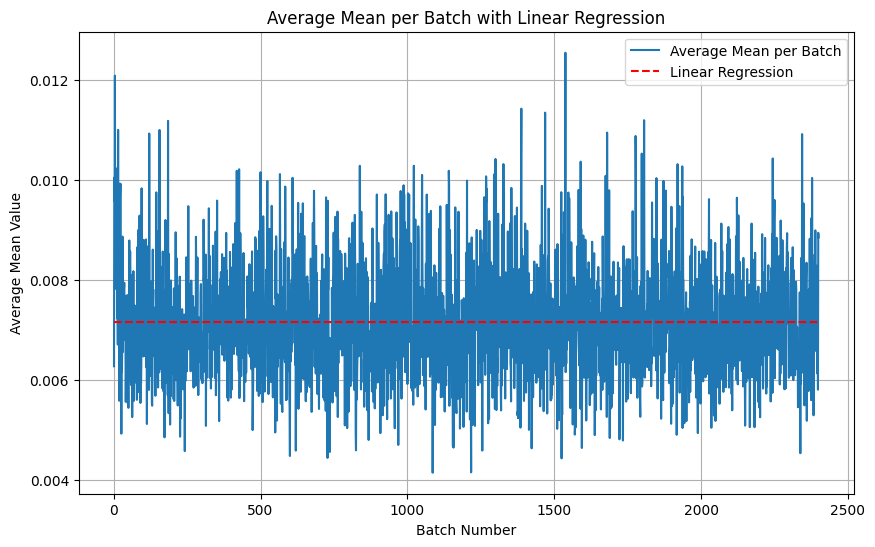

0

In [12]:
average_means_per_batch9 = torch.mean(coeffs_mean_tensor, dim=1)
plot_dist_means(average_means_per_batch9, 2400)

In [13]:
filename= 'fixedCoeff/allBatches1LayersCoeffs1_20240530_115846'
output_dir = './results/PearsonBatch04_05/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, filename+'.pth')

loaded_data = torch.load(file_path)

In [14]:
coeffs_mean_tensor = torch.stack(loaded_data['coeffs_mean'])
coeffs_mean_tensor = coeffs_mean_tensor.squeeze(2)
print(coeffs_mean_tensor.shape)

# Assume loaded_data['coeffs_mean'] is already available as a list of tensors on GPU
coeffs_mean = loaded_data['coeffs_mean']
print("ok 0")

# Step 2: Compute the average mean per batch
average_means_per_batch = torch.mean(coeffs_mean_tensor, dim=1)
print("ok 2")

torch.Size([2400, 100])
ok 0
ok 2


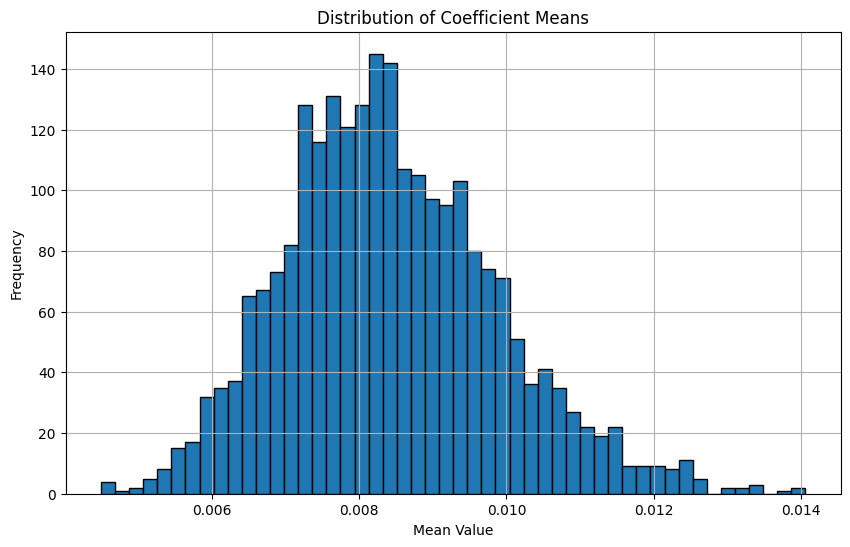

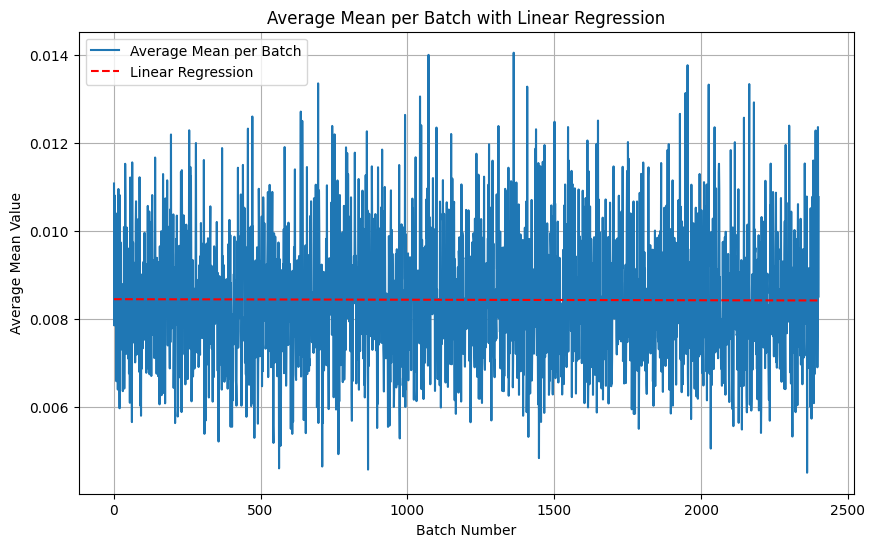

0

In [15]:
average_means_per_batch9 = torch.mean(coeffs_mean_tensor, dim=1)
plot_dist_means(average_means_per_batch9, 2400)